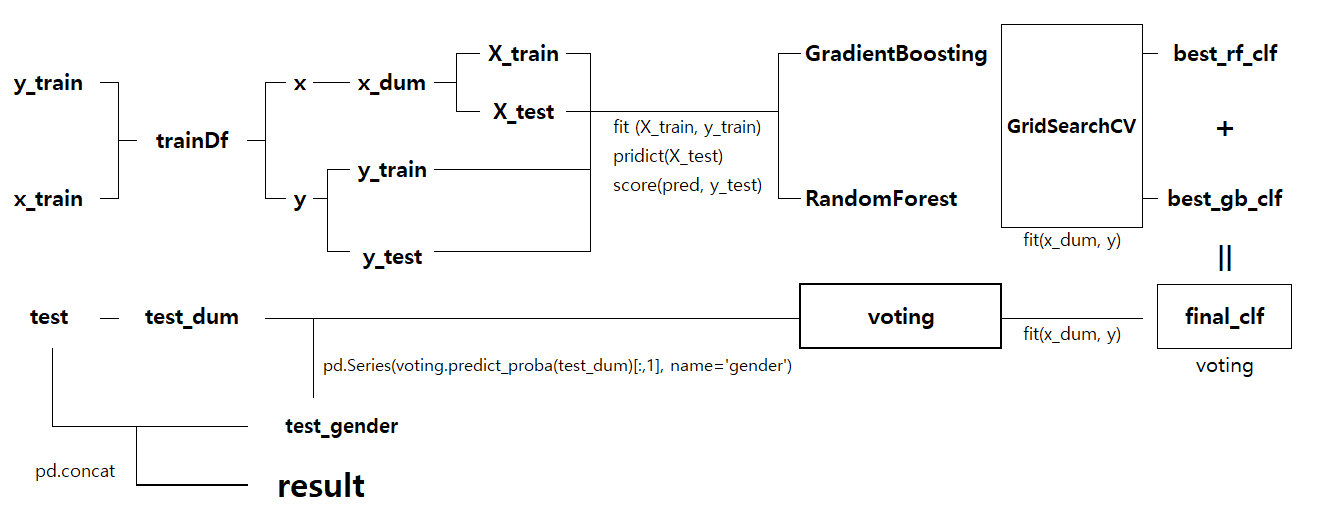

# 파일읽기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
y_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/y_train.csv')
X_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/X_train.csv',encoding='euc-kr')
test_data = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/X_test.csv',encoding='euc-kr')

In [3]:
train_data=pd.merge(X_train, y_train)

# 데이터 조회하기

In [4]:
train_data.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286,0.376000
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682,0.484449
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000,0.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000,0.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000,1.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000,1.000000


In [5]:
test_data.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,2482.000000,2.482000e+03,2.482000e+03,8.710000e+02,2482.000000,2482.000000,2482.000000,2482.000000
mean,4740.500000,1.010275e+08,2.177048e+07,2.554716e+07,19.516922,2.819388,0.293812,20.286060
std,716.636007,1.732132e+08,3.504919e+07,5.944074e+07,25.973972,1.754550,0.282600,24.108756
min,3500.000000,-3.744000e+07,-3.744000e+07,1.000000e+04,1.000000,1.000000,0.000000,0.000000
25%,4120.250000,5.076868e+06,2.884350e+06,2.414000e+06,2.000000,1.750000,0.023456,4.000000
50%,4740.500000,3.051686e+07,1.075250e+07,8.100000e+06,9.000000,2.430952,0.250000,13.000000
75%,5360.750000,1.264255e+08,2.627700e+07,2.228090e+07,26.750000,3.375000,0.423566,27.000000
max,5981.000000,2.861238e+09,5.932250e+08,8.715144e+08,222.000000,15.875000,1.000000,177.000000


# 결측치 처리

In [6]:
train_data.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
gender        0
dtype: int64

In [7]:
test_data.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [8]:
train_data['환불금액']=train_data['환불금액'].fillna(0)
test_data['환불금액']=test_data['환불금액'].fillna(0)

 - df.dropna(how='all') : 모두 Nan인 행 삭제
 - df.drop_duplicates() : 행 내용이 동일한 경우 제거
 - df.drop_duplicates(['year'], keep='last') : year 변수 기준 중복값 중 마지막만 남겨둠

# 이상치 처리

In [9]:
def get_outlier(df, columns):
    for column in columns:
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        iqr=q3-q1
        low=q1-1.5*iqr
        high=q3+1.5*iqr
        df.loc[df[column]<low, column]=low
        df.loc[df[column]>high, column]=high
    return df

In [10]:
cut_train_data=get_outlier(train_data, ['총구매액', '최대구매액', '환불금액'])
cut_test_data=get_outlier(test_data, ['총구매액', '최대구매액', '환불금액'])

In [11]:
cut_train_data

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840.0,11264000.0,6605625.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000.0,2136000.0,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000.0,1639000.0,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620.0,4935000.0,0.0,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000.0,24000000.0,0.0,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200.0,3042900.0,0.0,골프,본 점,1,2.000000,1.000000,0,1
3496,3496,29628600.0,7200000.0,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,3497,75000.0,75000.0,0.0,주방용품,창원점,1,1.000000,0.000000,0,0
3498,3498,1875000.0,1000000.0,0.0,화장품,본 점,2,1.000000,0.000000,39,0


In [12]:
cut_test_data

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400.0,22000000.0,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,308448355.0,38558000.0,7435625.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140.0,14825000.0,7435625.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080.0,5225000.0,0.0,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790.0,1411200.0,0.0,수산품,청량리점,3,2.666667,0.125000,8
...,...,...,...,...,...,...,...,...,...,...
2477,5977,82581500.0,23976000.0,0.0,골프,부산본점,8,1.750000,0.642857,40
2478,5978,480000.0,480000.0,0.0,섬유잡화,광주점,1,1.000000,0.000000,0
2479,5979,260003790.0,25750000.0,0.0,남성 캐주얼,본 점,19,3.736842,0.915493,18
2480,5980,88991520.0,18120000.0,0.0,육류,본 점,5,3.600000,0.444444,60


결측치, 이상치 처리 완료한 데이터 : cut_train_data, cut_test_data

# Dummy화

In [13]:
cat_train_data=cut_train_data[['주구매상품', '주구매지점']]
remain_train_data=cut_train_data.drop(['주구매상품', '주구매지점'], axis=1)
cat_test_data=cut_test_data[['주구매상품', '주구매지점']]
remain_test_data=cut_test_data.drop(['주구매상품', '주구매지점'], axis=1)

In [14]:
pre_train_dum=pd.get_dummies(cat_train_data)
pre_test_dum=pd.get_dummies(cat_test_data)
missing_cols=set(pre_train_dum.columns)-set(pre_test_dum.columns) # train data에는 있는데 test data에 없는 더미
for c in missing_cols:
    pre_test_dum[c]=0

In [15]:
train_dum=pd.concat([remain_train_data, pre_train_dum], axis=1)
test_dum=pd.concat([remain_test_data, pre_test_dum], axis=1)

In [16]:
train_dum

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender,주구매상품_가공식품,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,0,68282840.0,11264000.0,6605625.0,19,3.894737,0.527027,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2136000.0,2136000.0,300000.0,2,1.500000,0.000000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,3197000.0,1639000.0,0.0,2,2.000000,0.000000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,16077620.0,4935000.0,0.0,18,2.444444,0.318182,16,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,29050000.0,24000000.0,0.0,2,1.500000,0.000000,85,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200.0,3042900.0,0.0,1,2.000000,1.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3496,3496,29628600.0,7200000.0,6049600.0,8,1.625000,0.461538,40,1,0,...,0,0,0,0,0,0,0,0,0,0
3497,3497,75000.0,75000.0,0.0,1,1.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3498,3498,1875000.0,1000000.0,0.0,2,1.000000,0.000000,39,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_dum

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,...,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점,주구매상품_소형가전
0,3500,70900400.0,22000000.0,4050000.0,13,1.461538,0.789474,26,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3501,308448355.0,38558000.0,7435625.0,90,2.433333,0.369863,3,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3502,305264140.0,14825000.0,7435625.0,101,14.623762,0.083277,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3503,7594080.0,5225000.0,0.0,5,2.000000,0.000000,47,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3504,1795790.0,1411200.0,0.0,3,2.666667,0.125000,8,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,82581500.0,23976000.0,0.0,8,1.750000,0.642857,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2478,5978,480000.0,480000.0,0.0,1,1.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2479,5979,260003790.0,25750000.0,0.0,19,3.736842,0.915493,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,5980,88991520.0,18120000.0,0.0,5,3.600000,0.444444,60,0,0,...,0,0,0,0,0,0,0,0,0,0


결측치, 이상치, Dummy화 완료한 데이터 : train_dum, test_dum

# 정규화, 표준화

주의: train data에는 fit_transform 이며, test data에는 transform만 적용 (test data에 또 학습을 시키면 train data와 조건 변형되므로)

In [46]:
num_train_data=train_dum[['총구매액', '최대구매액', '환불금액']]
remain_train_data=train_dum.drop(['총구매액', '최대구매액', '환불금액'], axis=1)
num_test_data=test_dum[['총구매액', '최대구매액', '환불금액']]
remain_test_data=test_dum.drop(['총구매액', '최대구매액', '환불금액'], axis=1)

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
scaler=StandardScaler()
pre_train_scale=scaler.fit_transform(num_train_data)
pre_test_scale=scaler.transform(num_test_data)

In [48]:
pd_pre_train_scale=pd.DataFrame(pre_train_scale, columns=num_train_data.columns)
pd_pre_test_scale=pd.DataFrame(pre_test_scale, columns=num_test_data.columns)

In [49]:
train_scale=pd.concat([remain_train_data, pd_pre_train_scale], axis=1)
test_scale=pd.concat([remain_test_data, pd_pre_test_scale], axis=1)

In [58]:
train_scale

,cust_id,내점일수,내점당구매건수,주말방문비율,구매주기,gender,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,...,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점,총구매액,최대구매액,환불금액
0,0,19,3.894737,0.527027,17,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.019904,-0.275018,1.896152
1,1,2,1.500000,0.000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,-0.786671,-0.829244,-0.497539
2,2,2,2.000000,0.000000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,-0.774372,-0.859420,-0.611423
3,3,18,2.444444,0.318182,16,1,0,0,0,0,...,0,0,0,0,0,0,0,-0.625061,-0.659297,-0.611423
4,4,2,1.500000,0.000000,85,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.474687,0.498274,-0.611423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,2.000000,1.000000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,-0.774625,-0.774179,-0.611423
3496,3496,8,1.625000,0.461538,40,1,0,0,0,0,...,0,0,0,0,0,0,0,-0.467980,-0.521773,1.685079
3497,3497,1,1.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-0.810562,-0.954382,-0.611423
3498,3498,2,1.000000,0.000000,39,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.789697,-0.898218,-0.611423


In [57]:
test_scale

,cust_id,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,...,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점,주구매상품_소형가전,총구매액,최대구매액,환불금액
0,3500,13,1.461538,0.789474,26,0,0,0,1,0,...,0,0,0,0,0,0,0,0.010439,0.376840,0.926006
1,3501,90,2.433333,0.369863,3,0,0,0,0,0,...,0,1,0,0,0,0,0,2.764070,1.382193,2.211230
2,3502,101,14.623762,0.083277,3,1,0,0,0,0,...,0,0,0,0,0,0,0,2.727159,-0.058805,2.211230
3,3503,5,2.000000,0.000000,47,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.723402,-0.641689,-0.611423
4,3504,3,2.666667,0.125000,8,0,0,0,0,0,...,0,0,0,0,1,0,0,-0.790615,-0.873251,-0.611423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,8,1.750000,0.642857,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0.145845,0.496817,-0.611423
2478,5978,1,1.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.805867,-0.929791,-0.611423
2479,5979,19,3.736842,0.915493,18,0,0,0,0,0,...,0,0,0,0,0,0,0,2.202506,0.604529,-0.611423
2480,5980,5,3.600000,0.444444,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0.220149,0.141258,-0.611423


결측치, 이상치, Dummy화, 정규화 완료한 데이터 : train_scale, test_scale

In [59]:
x_dum=train_scale.drop(['gender'], axis=1)
y=train_scale['gender']

- pv_t.pivot(index='주구매지점', columns='주구매상품', values='counts') : 주구매지점/주구매상품 값은 counts를 넣는 pv_data를 만들어라
- fillna(0) pv_data에서 결측값은 0을 넣어라 
- pv_data.sum(axis=1) : 각 지점별 counts의 합
- pv_data[v]=pv_data[v]/pv_data.sum(axis=1)*100 : 각 지점에서 상품이 팔린 비율

In [17]:
pv_data=pv_data.loc[pv_data.index !='상인점']

상인점의 경우 1가지 구매 케이스밖에 없기 때문에 삭제

In [18]:
center_gender=t.groupby(['주구매지점', 'gender']).count()['cust_id'].reset_index()
center_gender=center_gender.pivot(index='주구매지점', columns='gender', values='cust_id').fillna(0)
center_gender.head(5)

gender,0,1
주구매지점,,
강남점,108.0,37.0
관악점,27.0,19.0
광주점,68.0,46.0
노원점,62.0,28.0
대구점,2.0,5.0


In [19]:
center_gender['total']=center_gender[0]+center_gender[1]
center_gender['ratio']=center_gender[1]/center_gender['total']*100

In [20]:
t.groupby('주구매지점').mean()['총구매액'].to_frame().sort_values('총구매액').head(3)

,총구매액
주구매지점,
센텀시티점,1.098891e+07
전주점,3.200927e+07
안양점,6.055826e+07


## 데이터 분리하기

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_dum, y, test_size=0.3, random_state=0, stratify=y)

학습데이터를 X_train, X_test, y_train, y_test로 분리시킨다

## 모델링

In [61]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #의사결정트리
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier #보팅, 랜덤포레스트, GBM
from xgboost import XGBClassifier #XGB

lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)
dt_clf=DecisionTreeClassifier(random_state=156)
vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
gb_clf=GradientBoostingClassifier(random_state=0)
xgb_clf=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

lr_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
vo_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=True)

lr_pred=lr_clf.predict(X_test)
knn_pred=knn_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
vo_pred=vo_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
gb_pred=gb_clf.predict(X_test)
xgb_pred=xgb_clf.predict(X_test)

C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0]	validation_0-auc:0.63102
[1]	validation_0-auc:0.63656
[2]	validation_0-auc:0.63479
[3]	validation_0-auc:0.64711
[4]	validation_0-auc:0.65188
[5]	validation_0-auc:0.67115
[6]	validation_0-auc:0.67316
[7]	validation_0-auc:0.67565
[8]	validation_0-auc:0.67728
[9]	validation_0-auc:0.67892
[10]	validation_0-auc:0.67934
[11]	validation_0-auc:0.68138
[12]	validation_0-auc:0.68366
[13]	validation_0-auc:0.68772
[14]	validation_0-auc:0.68882
[15]	validation_0-auc:0.68976
[16]	validation_0-auc:0.68975
[17]	validation_0-auc:0.69129
[18]	validation_0-auc:0.68984
[19]	validation_0-auc:0.68986
[20]	validation_0-auc:0.69181
[21]	validation_0-auc:0.69306
[22]	validation_0-auc:0.69344
[23]	validation_0-auc:0.69320
[24]	validation_0-auc:0.69305
[25]	validation_0-auc:0.69389
[26]	validation_0-auc:0.69391
[27]	validation_0-auc:0.69541
[28]	validation_0-auc:0.69633
[29]	validation_0-auc:0.69682
[30]	validation_0-auc:0.69756
[31]	validation_0-auc:0.69866
[32]	validation_0-auc:0.69920
[33]	validation_0-au

C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-auc:0.70286
[43]	validation_0-auc:0.70291
[44]	validation_0-auc:0.70282
[45]	validation_0-auc:0.70365
[46]	validation_0-auc:0.70400
[47]	validation_0-auc:0.70445
[48]	validation_0-auc:0.70435
[49]	validation_0-auc:0.70407
[50]	validation_0-auc:0.70351
[51]	validation_0-auc:0.70369
[52]	validation_0-auc:0.70330
[53]	validation_0-auc:0.70346
[54]	validation_0-auc:0.70319
[55]	validation_0-auc:0.70336
[56]	validation_0-auc:0.70342
[57]	validation_0-auc:0.70313
[58]	validation_0-auc:0.70216
[59]	validation_0-auc:0.70179
[60]	validation_0-auc:0.70223
[61]	validation_0-auc:0.70226
[62]	validation_0-auc:0.70171
[63]	validation_0-auc:0.70228
[64]	validation_0-auc:0.70299
[65]	validation_0-auc:0.70291
[66]	validation_0-auc:0.70220
[67]	validation_0-auc:0.70215
[68]	validation_0-auc:0.70295
[69]	validation_0-auc:0.70325
[70]	validation_0-auc:0.70378
[71]	validation_0-auc:0.70340
[72]	validation_0-auc:0.70284
[73]	validation_0-auc:0.70279
[74]	validation_0-auc:0.70190
[75]	valid

In [62]:
from sklearn.metrics import accuracy_score
print('LogisticRegression 분류기 정확도:', accuracy_score(y_test, lr_pred))
print('KNN 분류기 정확도:', accuracy_score(y_test, knn_pred))
print('Decision Tree 분류기 정확도:', accuracy_score(y_test, dt_pred))
print('Voting 분류기 정확도:', accuracy_score(y_test, vo_pred))
print('Random Forest 분류기 정확도:', accuracy_score(y_test, rf_pred))
print('Gradient Boosting 분류기 정확도:', accuracy_score(y_test, gb_pred))
print('XGB 분류기 정확도:', accuracy_score(y_test, xgb_pred))

LogisticRegression 분류기 정확도: 0.6628571428571428
KNN 분류기 정확도: 0.5895238095238096
Decision Tree 분류기 정확도: 0.5771428571428572
Voting 분류기 정확도: 0.621904761904762
Random Forest 분류기 정확도: 0.6619047619047619
Gradient Boosting 분류기 정확도: 0.6752380952380952
XGB 분류기 정확도: 0.6828571428571428


### cross_val_score 

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores_lr=cross_val_score(lr_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_knn=cross_val_score(knn_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_dt=cross_val_score(dt_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_vo=cross_val_score(vo_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_rf=cross_val_score(rf_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_gb=cross_val_score(gb_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_xgb=cross_val_score(xgb_clf, x_dum, y, scoring='roc_auc', cv=3)

print('cross_LogisticRegression 분류기 정확도:', np.round(np.mean(scores_lr),4))
print('corss_KNN 분류기 정확도:', np.round(np.mean(scores_knn),4))
print('cross_Decision Tree 분류기 정확도:', np.round(np.mean(scores_dt),4))
print('cross_Voting 분류기 정확도:', np.round(np.mean(scores_vo),4))
print('cross_Random Forest 분류기 정확도:', np.round(np.mean(scores_rf),4))
print('cross_Gradient Boosting 분류기 정확도:', np.round(np.mean(scores_gb),4))
print('cross_XGB 분류기 정확도:', np.round(np.mean(scores_xgb),4))

C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[00:16:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_LogisticRegression 분류기 정확도: 0.661
corss_KNN 분류기 정확도: 0.5326
cross_Decision Tree 분류기 정확도: 0.5377
cross_Voting 분류기 정확도: 0.6613
cross_Random Forest 분류기 정확도: 0.6526
cross_Gradient Boosting 분류기 정확도: 0.6618
cross_XGB 분류기 정확도: 0.6504


## GridSearchCV

가장 높은 성능을 보인 Gradient Boosting과 Random Forest 분류기로 앙상블 시행

In [64]:
from sklearn.model_selection import GridSearchCV
rf_params={'n_estimators':[100], 'max_depth': [6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}
gb_params={'n_estimators':[100,500], 'learning_rate' : [0.05, 0.1]}

In [65]:
grid_rf_clf=GridSearchCV(rf_clf, param_grid=rf_params, scoring='roc_auc', cv=2, n_jobs=-1)
grid_gb_clf=GridSearchCV(gb_clf, param_grid=gb_params, scoring='roc_auc', cv=2, verbose=1)
grid_rf_clf.fit(x_dum, y)
grid_gb_clf.fit(x_dum, y)
best_rf_clf=grid_rf_clf.best_estimator_
best_gb_clf=grid_gb_clf.best_estimator_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


## Voting

In [32]:
from sklearn.ensemble import VotingClassifier
final_clf=VotingClassifier(estimators=[('RF', best_rf_clf), ('GB', best_gb_clf)], voting='soft', n_jobs=4)

In [33]:
voting=final_clf.fit(x_dum, y)

## 예측 결과

In [34]:
test_gender=pd.Series(voting.predict_proba(test_dum)[:,1], name='gender')

In [35]:
results=pd.concat([test.cust_id, test_gender], axis=1)
results.head(10)

,cust_id,gender
0,3500,0.566254
1,3501,0.555867
2,3502,0.591271
3,3503,0.587948
4,3504,0.594253
5,3505,0.524528
6,3506,0.605452
7,3507,0.626144
8,3508,0.533704
9,3509,0.598282


In [36]:
results.to_csv('ensemble_voting.csv', index=False)